<a href="https://colab.research.google.com/github/BrianHall1992/LAGCC-Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##dd = https://biolib.com/shd2020/Diabetes-Machine-Learning-Data/


## Import the dataset, replace the missing values ? with NaNs so we can perform transformations on the dataset

In [12]:
missing_val= '?'
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values=missing_val)
df['diabetesMed'].unique()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['No', 'Yes'], dtype=object)

##Do some aggregation to see the patient split by gender, race, and age

In [13]:
df.groupby(['gender'])['patient_nbr'].count().sort_values(ascending=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: patient_nbr, dtype: int64

In [14]:
df.groupby(['age'])['patient_nbr'].count().sort_values(ascending=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: patient_nbr, dtype: int64

In [5]:
df.groupby(['race'])['patient_nbr'].count().sort_values(ascending=False)

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: patient_nbr, dtype: int64

##Limit to the columns of personal interest,then rename. Specifically, I want to see how things like number of inpatient/outpatient vists vary by categories, and whether these move in the same direction, I would assume they do

In [6]:
columns = ['patient_nbr','race','gender','age','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','time_in_hospital']

In [74]:
df1 = df[columns]
df2=df1.rename(columns = {'patient_nbr':'Patient Number','race':'Race','gender':'Gender','age':'Age','medical_specialty':'Medical Specialty','num_lab_procedures':'Number of Lab Procedures','num_procedures':'Number of Procedures','num_medications':'Number of Medications Prescribed','number_outpatient':'Number of Outpatient Visits','number_emergency':'Number of Emergency Room Visits','number_inpatient':'Number of Inpatient Visits','time_in_hospital':'Days Spent in Hospital'})
df2.head()

,Patient Number,Race,Gender,Age,Medical Specialty,Number of Lab Procedures,Number of Procedures,Number of Medications Prescribed,Number of Outpatient Visits,Number of Emergency Room Visits,Number of Inpatient Visits,Days Spent in Hospital
0,8222157,Caucasian,Female,[0-10),Pediatrics-Endocrinology,41,0,1,0,0,0,1
1,55629189,Caucasian,Female,[10-20),NaN,59,0,18,0,0,0,3
2,86047875,AfricanAmerican,Female,[20-30),NaN,11,5,13,2,0,1,2
3,82442376,Caucasian,Male,[30-40),NaN,44,1,16,0,0,0,2
4,42519267,Caucasian,Male,[40-50),NaN,51,0,8,0,0,0,1


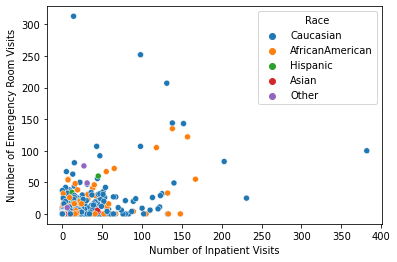

In [78]:
df_race=df2.groupby(['Patient Number','Race']).agg({'Number of Inpatient Visits':'sum', 'Number of Procedures':'sum','Number of Medications Prescribed':'sum', 'Number of Emergency Room Visits':'sum','Days Spent in Hospital':'sum'})
sns.scatterplot(x='Number of Inpatient Visits',y='Number of Emergency Room Visits',hue='Race',data=df_race)


After aggregating by patient to see their aggregate stats, I plotted some variables against the number of emergency room visits. It's hard to see if there is any clear relationship between number of inpatient visits and number of emergency room visits, but there are also clear outliers. All the outliers appear to be Caucasian.

There is maybe a closer correlation between number of medications and number of emergenct room visits, but again most cluster to having very low numbers of both in the bottom right quadrant of the graph.

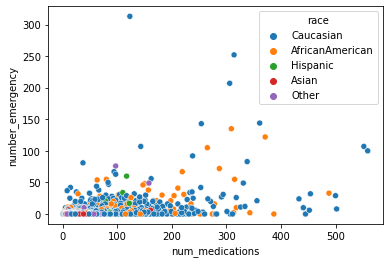

In [8]:
sns.scatterplot(x='Number of Medications Prescribed',y='Number of Emergency Room Visits',hue='Race',data=df_race)

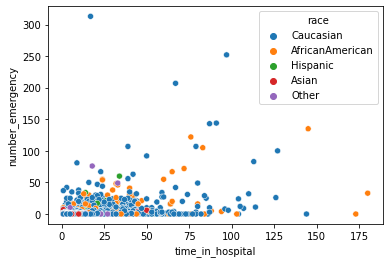

In [9]:
sns.scatterplot(x='Days Spent in Hospital',y='Number of Emergency Room Visits',hue='Race',data=df_race)


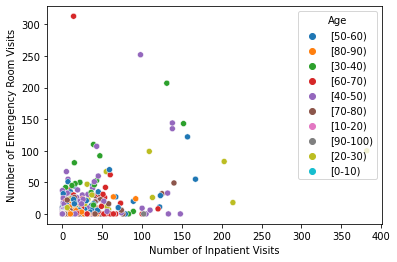

In [79]:
df_age=df2.groupby(['Patient Number','Age']).agg({'Number of Inpatient Visits':'sum', 'Number of Procedures':'sum','Number of Medications Prescribed':'sum', 'Number of Emergency Room Visits':'sum','Days Spent in Hospital':'sum'})
sns.scatterplot(x='Number of Inpatient Visits',y='Number of Emergency Room Visits',hue='Age',data=df_age)

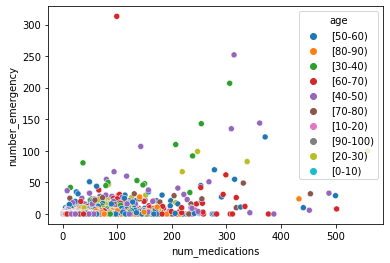

In [9]:
sns.scatterplot(x='Number of Medications Prescribed',y='Number of Emergency Room Visits',hue='Age',data=df_age)

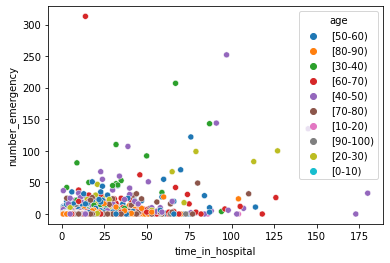

In [10]:
sns.scatterplot(x='Days Spent in Hospital',y='Number of Emergency Room Visits',hue='Age',data=df_age)

##Age seems like a better category to analyze with outliers less clusted within one bin, so to focus on the upper-right quadrant I'm going to limit this to the patients with greater than 30 emergency room visits.

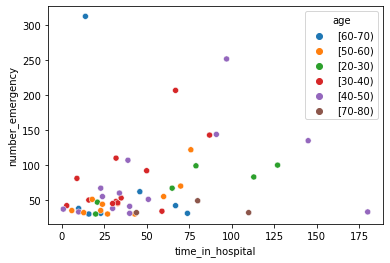

In [54]:
df_hv = df_age[df_age['Number of Emergency Room Visits'] >=30]
sns.scatterplot(x='Days Spent in Hospital',y='Number of Emergency Room Visits',hue='Age', data=df_hv)

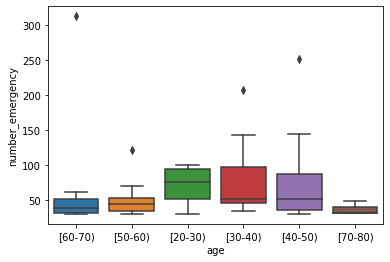

In [56]:
df_hv.reset_index(inplace=True)
df_hv.set_index('Patient Number')
sns.boxplot(y='Number of Emergency Room Visits',x='Age',data=df_hv)

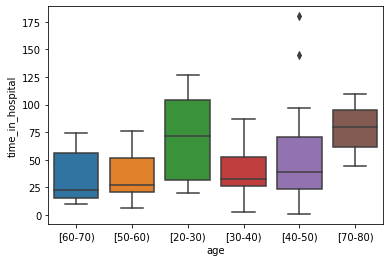

In [57]:
sns.boxplot(y='time_in_hospital',x='Age',data=df_hv)